In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import os, glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
csv_paths = glob.glob(os.path.join("../Data", "*.csv")) + glob.glob(os.path.join("../DataAugmentation/AugmentedData", "*.csv"))

combined_df = pd.DataFrame()
for path in csv_paths:
    df = pd.read_csv(path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [106]:
X = combined_df.drop('label', axis=1)
y = combined_df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'learning_rate': 0.1,
    'max_depth': 3,
}

# evallist = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()))
model.fit(X_train, y_train, verbose=True)

# model = xgb.train(params, dtrain, num_boost_round=100, evals=evallist)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [109]:
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [110]:
start_time = time.time()
model.predict(X_test)
y_pred = model.predict(X_test)
end_time = time.time()
print(f"Prediction Time: {end_time - start_time:.4f} seconds")

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Prediction Time: 0.0844 seconds
Test Accuracy: 99.95%


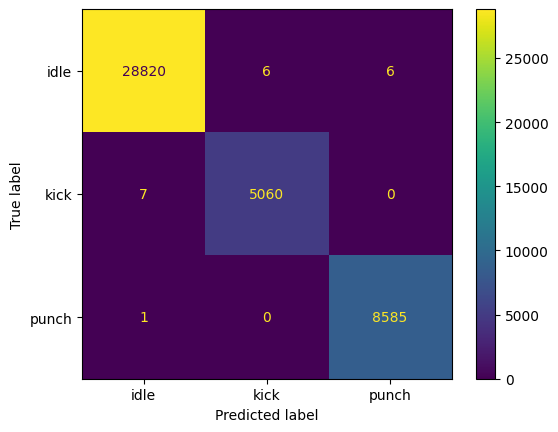

In [112]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(multilabel_cm, display_labels=le.classes_)
disp.plot()

In [113]:
model.predict(X_train)
y_train_pred = model.predict(X_train)
train_accuracy = np.sum(y_train_pred == y_train) / len(y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

Train Accuracy: 99.97%


In [114]:
model.save_model('xgboost_model.json')

In [125]:
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('xgboost_model.json')
loaded_model.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [126]:
loaded_model.predict(X_test[0].reshape(1, -1))

array([0], dtype=int32)

In [81]:
le.classes_

array(['idle', 'kick', 'punch'], dtype=object)

In [84]:
len(X_test.columns)

84